In [1]:
#import necessaries libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset into dataframe
diabetic = pd.read_csv('./Data/diabetic_data.csv')
diabetic.shape

(101766, 50)

# DATA CLEANSING AND PREPROCESSING

In [3]:
diabetic.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
diabetic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
diabetic.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [6]:
#check for duplicates
diabetic.duplicated().sum()

0

In [7]:
#check for missing values
missing_values = diabetic.isin(['?']).sum() + diabetic.isnull().sum()
print(missing_values[missing_values > 0])

#get percentage of missing values
percent_missing_values = missing_values[missing_values > 0]/diabetic.shape[0]*100
print(percent_missing_values)

race                  2273
weight               98569
payer_code           40256
medical_specialty    49949
diag_1                  21
diag_2                 358
diag_3                1423
max_glu_serum        96420
A1Cresult            84748
dtype: int64
race                  2.233555
weight               96.858479
payer_code           39.557416
medical_specialty    49.082208
diag_1                0.020636
diag_2                0.351787
diag_3                1.398306
max_glu_serum        94.746772
A1Cresult            83.277322
dtype: float64


In [8]:
#drop weight, max_glu_serum, A1Cresult columns as they have more than 40% missing values
diabetic = diabetic.drop(['weight', 'max_glu_serum', 'A1Cresult', 'medical_specialty'], axis=1)

#drop ids columns that are not useful for analysis
diabetic = diabetic.drop(['encounter_id', 'patient_nbr', 'payer_code', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id'], axis=1)
print(diabetic.shape)

# drop rows that has missing values in diag_1, diag_2, diag_3, and race columns
# Define the columns to be checked for missing values
columns_to_check = ['diag_1', 'diag_2', 'diag_3', 'race']

# Filter rows where the values in any of the specified columns are not equal to '?'
diabetic = diabetic[~diabetic[columns_to_check].isin(['?']).any(axis=1)]
print(diabetic.shape)

(101766, 40)
(98053, 40)


In [9]:
diabetic.select_dtypes(include='object').columns

Index(['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [10]:
#change diagnosis columns based on its ICD-9 code
def map_diagnosis(icd9_code):
    try:
        # Convert the ICD-9 code to float to compare with ranges
        code = float(icd9_code.split('.')[0])
    except ValueError:
        # Handle cases where code can't be converted to a float (invalid or missing values)
        return 'other'

    # Apply the given rules for categorizing the diagnoses
    if (390 <= code <= 459) or (code == 785):
        return 'circulatory'
    elif (520 <= code <= 579) or (code == 787):
        return 'digestive'
    elif (580 <= code <= 629) or (code == 788):
        return 'genitourinary'
    elif 250 <= code < 251:
        return 'diabetes'
    elif 800 <= code <= 999:
        return 'injury'
    elif 710 <= code <= 739:
        return 'musculoskeletal'
    elif 140 <= code <= 239:
        return 'neoplasms'
    elif (460 <= code <= 519) or (code == 786):
        return 'respiratory'
    else:
        return 'other'

# Apply the function to the 'Diagnosis' column to create a new mapped diagnosis
diabetic['diag1_map'] = diabetic['diag_1'].apply(map_diagnosis)
diabetic['diag2_map'] = diabetic['diag_2'].apply(map_diagnosis)
diabetic['diag3_map'] = diabetic['diag_3'].apply(map_diagnosis)


# Mapping age ranges to numerical values using ordinal encoding
age_mapping = {
    '[0-10)': 0,
    '[10-20)': 1,
    '[20-30)': 2,
    '[30-40)': 3,
    '[40-50)': 4,
    '[50-60)': 5,
    '[60-70)': 6,
    '[70-80)': 7,
    '[80-90)': 8,
    '[90-100)': 9
}
diabetic['age'] = diabetic['age'].map(age_mapping)


In [11]:
from sklearn.preprocessing import LabelEncoder
#Label Encoding for object columns
label_to_encode = {'race', 'gender', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
                   'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
                   'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 
                   'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 
                   'metformin-rosiglitazone', 'metformin-pioglitazone', 'diabetesMed', 'change', 'diag1_map', 'diag2_map', 'diag3_map'}
for col in label_to_encode:
    diabetic[col] = LabelEncoder().fit_transform(diabetic[col])

In [12]:
# Create a new column 'readmitted' to convert the readmitted column to binary values with focus on early readmission
diabetic['early_readmission'] = diabetic['readmitted'].apply(lambda x: 1 if x == '<30' else 0)
diabetic.drop('readmitted', axis=1, inplace=True)

array([[<Axes: title={'center': 'race'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'time_in_hospital'}>,
        <Axes: title={'center': 'num_lab_procedures'}>,
        <Axes: title={'center': 'num_procedures'}>],
       [<Axes: title={'center': 'num_medications'}>,
        <Axes: title={'center': 'number_outpatient'}>,
        <Axes: title={'center': 'number_emergency'}>,
        <Axes: title={'center': 'number_inpatient'}>,
        <Axes: title={'center': 'number_diagnoses'}>,
        <Axes: title={'center': 'metformin'}>],
       [<Axes: title={'center': 'repaglinide'}>,
        <Axes: title={'center': 'nateglinide'}>,
        <Axes: title={'center': 'chlorpropamide'}>,
        <Axes: title={'center': 'glimepiride'}>,
        <Axes: title={'center': 'acetohexamide'}>,
        <Axes: title={'center': 'glipizide'}>],
       [<Axes: title={'center': 'glyburide'}>,
        <Axes: title={'center': 'tolbutamide'}>

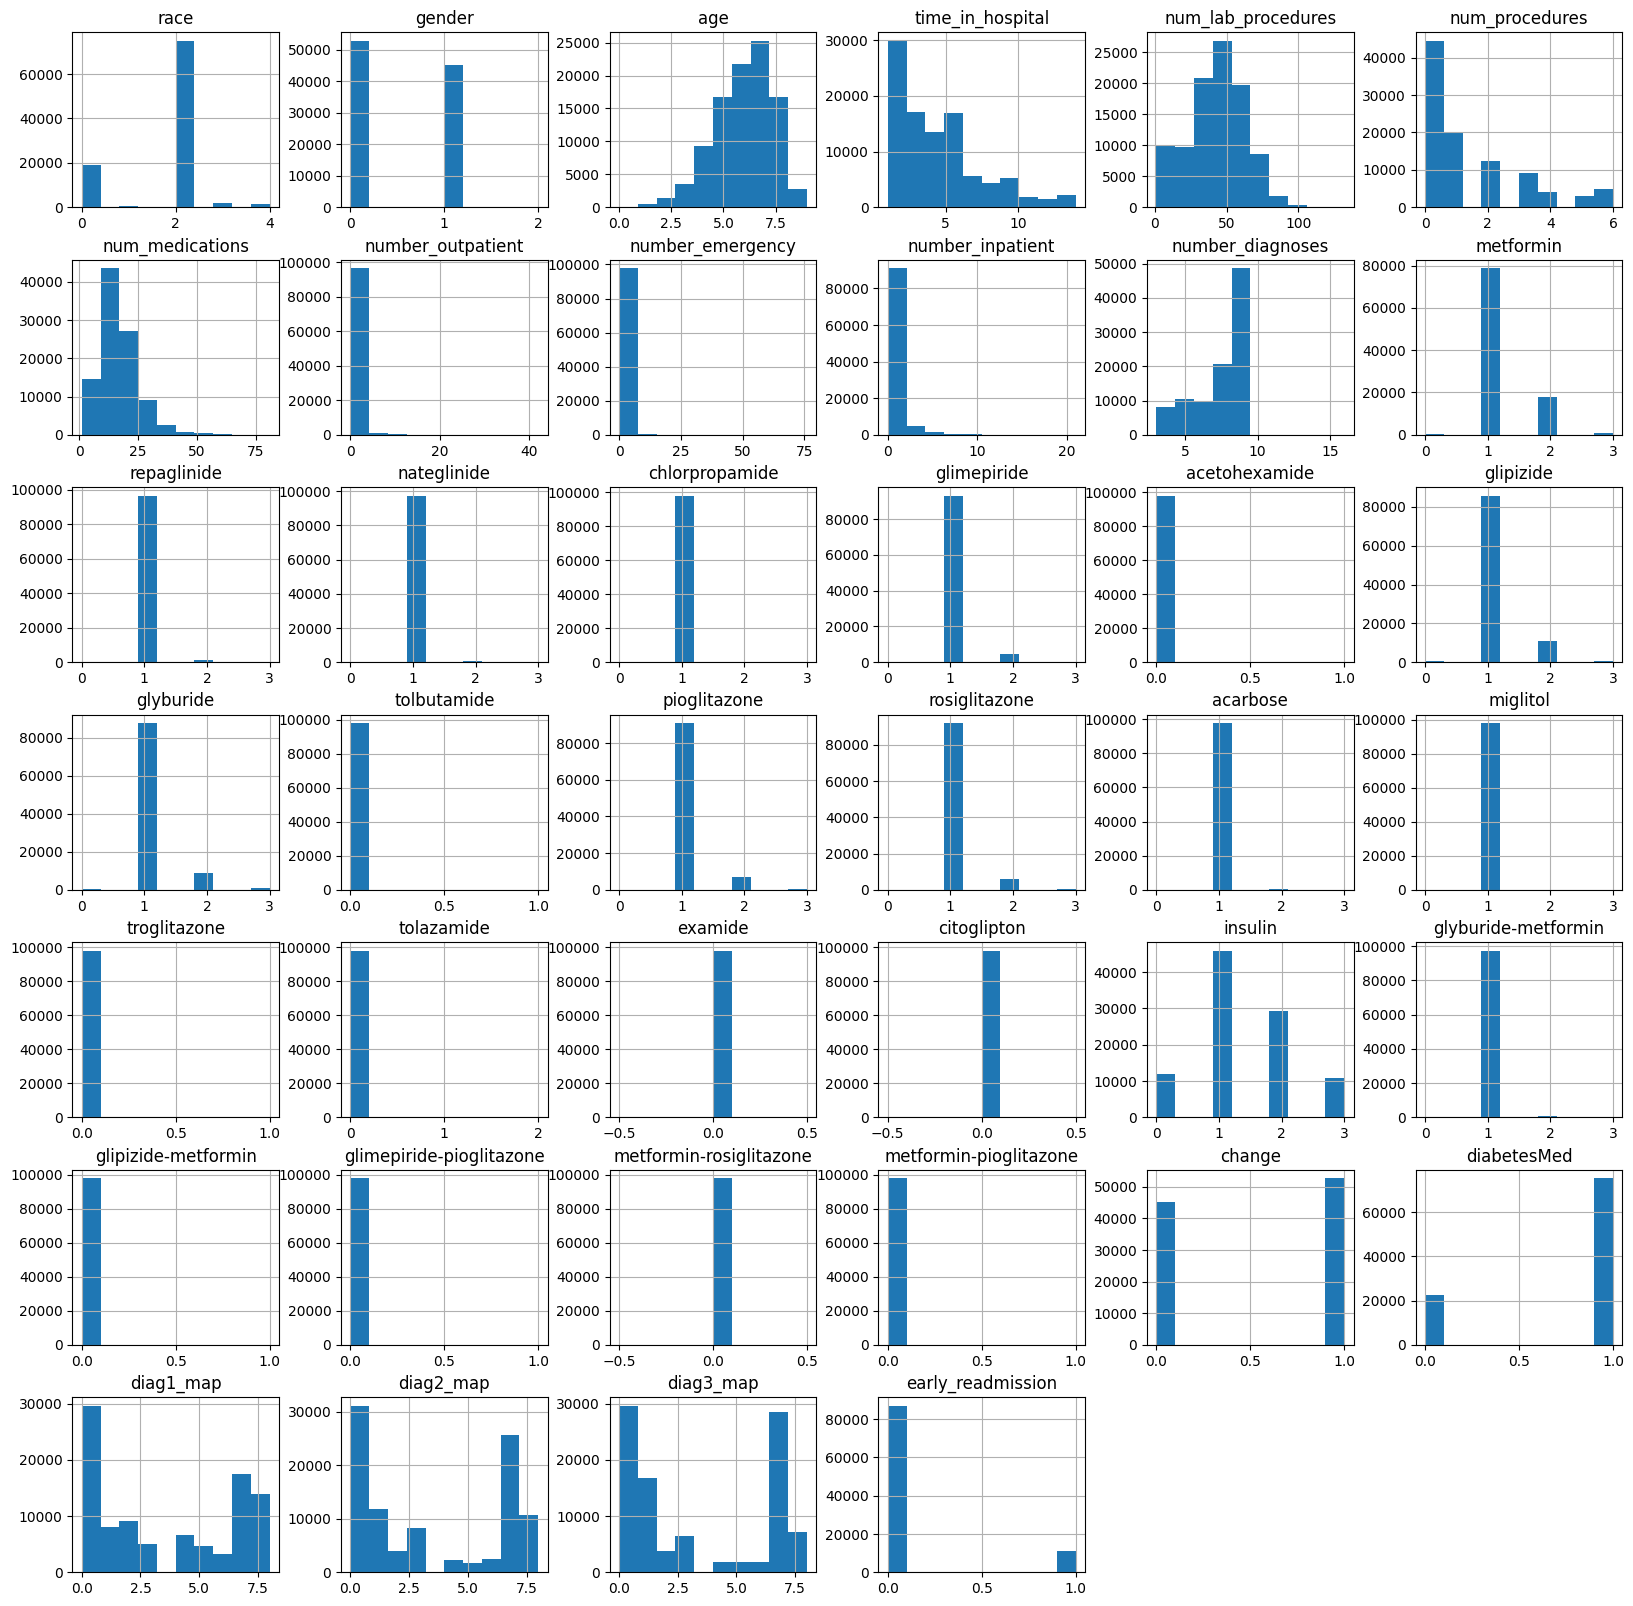

In [13]:
# Visualize the distribution of each attributes
diabetic.hist(figsize=(20, 20))

In [14]:
# Check Covariance Matrix
numeric_diabetic = diabetic.select_dtypes(include=[float, int])
cov_matrix = numeric_diabetic.cov()
print(cov_matrix['early_readmission'].sort_values(ascending=False))

num_lab_procedures          0.124173
early_readmission           0.100122
num_medications             0.096907
number_inpatient            0.065881
time_in_hospital            0.041105
number_diagnoses            0.026961
number_emergency            0.018068
diag3_map                   0.008194
number_outpatient           0.007476
age                         0.006683
diabetesMed                 0.003611
diag2_map                   0.000871
insulin                     0.000837
repaglinide                 0.000451
glipizide                   0.000050
nateglinide                 0.000009
examide                     0.000000
citoglipton                 0.000000
metformin-rosiglitazone     0.000000
metformin-pioglitazone     -0.000001
acetohexamide              -0.000001
glimepiride-pioglitazone   -0.000001
troglitazone               -0.000003
glipizide-metformin        -0.000005
tolazamide                 -0.000013
tolbutamide                -0.000015
miglitol                   -0.000036
g

In [15]:
# Drop columns with low covariance
covariance_threshold = 0.00001
low_covariance_columns = cov_matrix['early_readmission'][np.abs(cov_matrix['early_readmission']) < covariance_threshold].index
print(low_covariance_columns)
diabetic = diabetic.drop(low_covariance_columns, axis=1)


Index(['nateglinide', 'acetohexamide', 'troglitazone', 'examide',
       'citoglipton', 'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone'],
      dtype='object')


In [16]:
# Check for correlation
numeric_diabetic = diabetic.select_dtypes(include=[float, int])
corr = numeric_diabetic.corr()
corr['early_readmission'].sort_values(ascending=False)

early_readmission      1.000000
number_inpatient       0.163812
number_emergency       0.060558
number_diagnoses       0.046497
time_in_hospital       0.043402
num_medications        0.037771
diabetesMed            0.027057
num_lab_procedures     0.019908
number_outpatient      0.018409
age                    0.013547
repaglinide            0.010457
diag3_map              0.008160
insulin                0.003154
diag2_map              0.000855
glipizide              0.000433
glyburide-metformin   -0.001739
tolazamide            -0.002057
gender                -0.002555
race                  -0.003018
tolbutamide           -0.003191
glyburide             -0.003826
acarbose              -0.004010
chlorpropamide        -0.004841
miglitol              -0.005385
rosiglitazone         -0.005411
pioglitazone          -0.006479
glimepiride           -0.008011
num_procedures        -0.012477
diag1_map             -0.016098
change                -0.019520
metformin             -0.024182
Name: ea

In [17]:
#drop columns with low correlation
correlation_threshold = 0.005
attributes = corr['early_readmission'][np.abs(corr['early_readmission']) > correlation_threshold].index
print(attributes)
diabetic = diabetic[attributes]
print(diabetic.shape)

Index(['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'metformin', 'repaglinide',
       'glimepiride', 'pioglitazone', 'rosiglitazone', 'miglitol', 'change',
       'diabetesMed', 'diag1_map', 'diag3_map', 'early_readmission'],
      dtype='object')
(98053, 20)


In [18]:
# Check Correlation 
# columns_to_check = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
#                    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
#                    'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 
#                    'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 
#                    'metformin-rosiglitazone', 'metformin-pioglitazone']

# # Filter out columns that do not exist in the DataFrame
# columns_to_check = [col for col in columns_to_check if col in corr.index]

# print(corr['diabetesMed'][columns_to_check].sort_values(ascending=False))

insulin                0.262339
metformin              0.246579
glipizide              0.183199
glyburide              0.162229
pioglitazone           0.145906
rosiglitazone          0.136311
glimepiride            0.114720
repaglinide            0.063280
glyburide-metformin    0.044890
acarbose               0.029324
chlorpropamide         0.015180
tolazamide             0.010534
miglitol               0.008288
tolbutamide            0.008223
Name: diabetesMed, dtype: float64


## Preprocessing  
Urszula Starowicz

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

In [20]:
# Select only numeric columns for outlier removal and correlation analysis
numeric_diabetic = diabetic.select_dtypes(include=[float, int])

# Set threshold for outlier removal (5% quantile-based)
def remove_outliers_percentile(df, lower_quantile=0.05, upper_quantile=0.95):
    lower_bound = df.quantile(lower_quantile)
    upper_bound = df.quantile(upper_quantile)
    return df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Initial row count
initial_row_count = diabetic.shape[0]

# Remove rows containing any outliers
cleaned_data = remove_outliers_percentile(numeric_diabetic)

# Calculate number of outliers removed
rows_removed = initial_row_count - cleaned_data.shape[0]
print(f"\nTotal rows removed due to outliers: {rows_removed}")

# Display a summary of remaining data after outlier removal
print("\nStatistical Summary for All Numeric Columns After Removing Outliers:")
print(cleaned_data.describe())

# Merge cleaned numeric data back with non-numeric data if needed
cleaned_data = pd.concat([cleaned_data, diabetic.select_dtypes(exclude=[float, int])], axis=1)
cleaned_data.reset_index(drop=True, inplace=True)

# Check for correlation with the 'early_readmission' column
corr = cleaned_data.select_dtypes(include=[float, int]).corr()
print("\nCorrelation with 'early_readmission':")
print(corr['early_readmission'].sort_values(ascending=False))

# Save cleaned data to a new CSV file
cleaned_data.to_csv('cleaned_data.csv', index=False)
print("\nCleaned data saved to 'cleaned_data.csv'")



Total rows removed due to outliers: 41154

Statistical Summary for All Numeric Columns After Removing Outliers:
                age  time_in_hospital  num_lab_procedures  num_procedures  \
count  56899.000000      56899.000000        56899.000000    56899.000000   
mean       6.189617          4.022109           43.086856        1.096891   
std        1.367222          2.419284           15.921125        1.365264   
min        3.000000          1.000000            4.000000        0.000000   
25%        5.000000          2.000000           33.000000        0.000000   
50%        6.000000          3.000000           44.000000        1.000000   
75%        7.000000          5.000000           55.000000        2.000000   
max        8.000000         11.000000           73.000000        5.000000   

       num_medications  number_outpatient  number_emergency  number_inpatient  \
count     56899.000000       56899.000000      56899.000000      56899.000000   
mean         15.209722         

In [21]:
# Function to remove outliers based on quantiles
def remove_outliers_percentile(df, lower_quantile=0.05, upper_quantile=0.95):
    lower_bound = df.quantile(lower_quantile)
    upper_bound = df.quantile(upper_quantile)
    return df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Calculate covariance and correlation matrices before outlier removal
numeric_diabetic_cov = diabetic.select_dtypes(include=[float, int])
cov_matrix = numeric_diabetic.cov()

numeric_diabetic_cor = diabetic.select_dtypes(include=[float, int])
corr = numeric_diabetic.corr()
corr['early_readmission'].sort_values(ascending=False)

# Load data without outliners
diabetic_processed = pd.read_csv('cleaned_data.csv')

# Calculate covariance and correlation matrices after outlier removal
numeric_diabetic_cov_processed = diabetic_processed.select_dtypes(include=[float, int])
cov_matrix_processed = numeric_diabetic.cov()

numeric_diabetic_cor_processed = diabetic_processed.select_dtypes(include=[float, int])
corr_processed = numeric_diabetic.corr()
corr_processed['early_readmission'].sort_values(ascending=False)

# Identify column where correlation or covariance with 'early_readmission' improves
target_column = 'early_readmission'

# Calculate differences
cov_diff = cov_matrix_processed[target_column] - cov_matrix[target_column]
corr_diff = corr_processed[target_column] - corr[target_column]

# Filter for columns where there is a difference
cov_changed = cov_diff[cov_diff != 0]
corr_changed = corr_diff[corr_diff != 0]

# Display only those columns with differences in covariance or correlation
print("\nFeatures with Covariance Differences (After - Before):")
print(cov_changed)

print("\nFeatures with Correlation Differences (After - Before):")
print(corr_changed)



Features with Covariance Differences (After - Before):
Series([], Name: early_readmission, dtype: float64)

Features with Correlation Differences (After - Before):
Series([], Name: early_readmission, dtype: float64)


In [22]:
# Using only numeric columns
numeric_columns = diabetic.select_dtypes(include=[np.number]).columns
diabetic[numeric_columns] = diabetic[numeric_columns].fillna(diabetic[numeric_columns].mean())

# Display basic statistical summary for all numeric columns
print("Statistical Summary for Numeric Columns:")
print(diabetic[numeric_columns].describe())

# Function to remove outliers using Z-score method
def remove_outliers_zscore(df, threshold=3):
    z_scores = np.abs((df - df.mean()) / df.std())
    return df[(z_scores < threshold).all(axis=1)]

# Function to remove outliers using IQR method
def remove_outliers_iqr(df, factor=1.5):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - factor * IQR)) | (df > (Q3 + factor * IQR))).any(axis=1)]

# Choose method for outlier removal
method = 'zscore'  # or 'iqr'

# Count initial rows for each numeric column
initial_counts = diabetic[numeric_columns].count()

# Remove outliers based on chosen method
if method == 'zscore':
    cleaned_data = remove_outliers_zscore(diabetic[numeric_columns])
elif method == 'iqr':
    cleaned_data = remove_outliers_iqr(diabetic[numeric_columns])

# Count cleaned rows for each column
cleaned_counts = cleaned_data.count()

# Calculate number of outliers removed for each column
outliers_removed_per_column = initial_counts - cleaned_counts

# Display a summary for each column
print("\nOutlier Removal Summary for Each Column:")
summary_df = pd.DataFrame({
    'Initial Count': initial_counts,
    'Cleaned Count': cleaned_counts,
    'Outliers Removed': outliers_removed_per_column
})
print(summary_df)

# Standardize the data
scaler = StandardScaler()
cleaned_data[numeric_columns] = scaler.fit_transform(cleaned_data[numeric_columns])

# Remove low-variance features
selector = VarianceThreshold(threshold=0.01)
cleaned_data = pd.DataFrame(selector.fit_transform(cleaned_data), columns=cleaned_data.columns[selector.get_support()])

# Display cleaned data statistics for all numeric columns
print("\nStatistical Summary for Numeric Columns After Preprocessing:")
print(cleaned_data.describe())

# Save cleaned data to a new CSV file
cleaned_data.to_csv('cleaned_data_stat.csv', index=False)
print("\nCleaned data saved to 'cleaned_data.csv'")


Statistical Summary for Numeric Columns:
                age  time_in_hospital  num_lab_procedures  num_procedures  \
count  98053.000000      98053.000000        98053.000000    98053.000000   
mean       6.126034          4.421976           43.148073        1.350749   
std        1.559075          2.993074           19.712033        1.708506   
min        0.000000          1.000000            1.000000        0.000000   
25%        5.000000          2.000000           31.000000        0.000000   
50%        6.000000          4.000000           44.000000        1.000000   
75%        7.000000          6.000000           57.000000        2.000000   
max        9.000000         14.000000          132.000000        6.000000   

       num_medications  number_outpatient  number_emergency  number_inpatient  \
count     98053.000000       98053.000000      98053.000000      98053.000000   
mean         16.119650           0.376378          0.202462          0.646864   
std           8.108476

In [23]:
# Calculate covariance and correlation matrices before outlier removal
numeric_diabetic_cov = diabetic.select_dtypes(include=[float, int])
cov_matrix = numeric_diabetic.cov()

numeric_diabetic_cor = diabetic.select_dtypes(include=[float, int])
corr = numeric_diabetic.corr()
corr['early_readmission'].sort_values(ascending=False)

diabetic_processed = pd.read_csv('cleaned_data_stat.csv')

# Calculate covariance and correlation matrices before statistical preprocessing
numeric_diabetic_cov_processed = diabetic_processed.select_dtypes(include=[float, int])
cov_matrix_processed = numeric_diabetic.cov()

# Calculate covariance and correlation matrices after statistical preprocessing
numeric_diabetic_cor_processed = diabetic_processed.select_dtypes(include=[float, int])
corr_processed = numeric_diabetic.corr()
corr_processed['early_readmission'].sort_values(ascending=False)

# Identify columns where correlation or covariance with 'early_readmission' improves
target_column = 'early_readmission'

# Calculate differences
cov_diff = cov_matrix_processed[target_column] - cov_matrix[target_column]
corr_diff = corr_processed[target_column] - corr[target_column]

# Filter for columns where there is a difference
cov_changed = cov_diff[cov_diff != 0]
corr_changed = corr_diff[corr_diff != 0]

# Display only those columns with differences in covariance or correlation
print("\nFeatures with Covariance Differences (After - Before):")
print(cov_changed)

print("\nFeatures with Correlation Differences (After - Before):")
print(corr_changed)



Features with Covariance Differences (After - Before):
Series([], Name: early_readmission, dtype: float64)

Features with Correlation Differences (After - Before):
Series([], Name: early_readmission, dtype: float64)


In this case, applying statistical preprocessing methods like scaling or normalizing features may not be beneficial due to the nature of the data. The selected attributes fall into a few specific types:  

First, many of the chosen features are boolean (e.g., yes/no, 0/1) or categorical variables, representing the presence or absence of a characteristic. Statistical transformations that modify the distribution, like scaling or normalization, are generally unnecessary for these types because they are already in a discrete form. In these cases, transforming the data would not add interpretative value, as boolean values do not represent magnitude or distance in a meaningful way.  

Second, features that represent counts—such as "time in hospital" or "number of procedures"—do not benefit much from scaling. These counts are naturally interpreted as whole numbers and are often used directly in predictive models, where differences in scale among them represent actual differences in frequency or duration. Transforming them statistically could dilute their natural interpretation and relevance.  

Since the primary purpose of scaling or normalizing is to make features comparable in magnitude, this step becomes less relevant for boolean and count features that are already logically consistent in their raw form. Thus, these features are better left unmodified to preserve their inherent meaning and interpretability.

After removing outliers and performing statistical preprocessing, the correlation and covariance values for the features do not change significantly. This indicates that scaling and normalizing do not add value in this context, and thus, it is unnecessary to apply these transformations in this case.


In [24]:
# Define features (X) and target (y)
X = diabetic.drop(columns=['early_readmission'])
y = diabetic['early_readmission']
k = len(attributes)
# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Define a preprocessing pipeline with SelectKBest to keep top 10 features
preprocessing_pipeline = Pipeline([
    ('selector', SelectKBest(f_classif, k=k))  # Select top 10 features
])

# Fit and transform the pipeline on the training data
X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train, y_train)
X_test_preprocessed = preprocessing_pipeline.transform(X_test)

# Create DataFrames for train and test datasets
train_data = pd.DataFrame(X_train_preprocessed, columns=X_train.columns[preprocessing_pipeline.named_steps['selector'].get_support()])
train_data['early_readmission'] = y_train

test_data = pd.DataFrame(X_test_preprocessed, columns=X_test.columns[preprocessing_pipeline.named_steps['selector'].get_support()])
test_data['early_readmission'] = y_test

# Save to CSV
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

# Output sample of the preprocessed data to verify
print("Sample of preprocessed training data:", train_data.head())
print("Sample of preprocessed test data:", test_data.head())


c:\Users\Admin\anaconda3\envs\Mohamed\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=20 is greater than n_features=19. All the features will be returned.
  warnings.warn(


Sample of preprocessed training data:    age  time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0    8                 3                  39               0               11   
1    8                 1                  27               0               10   
2    8                 1                  44               0               13   
3    7                10                  66               5               32   
4    6                 7                  32               3               40   

   number_outpatient  number_emergency  number_inpatient  number_diagnoses  \
0                  0                 0                 4                 9   
1                  0                 0                 0                 9   
2                  0                 0                 1                 5   
3                  0                 0                 0                 9   
4                  0                 0                 0                 7   

   met

# Decision Tree Features Importance  
We conducted an analysis using a decision tree model to examine the potential impact of the 'medical specialty' feature on early readmission rates. However, our findings showed no significant correlation between medical specialty and the likelihood of early readmission, and the model failed to make accurate predictions based on this feature. Due to the lack of predictive value, we decided not to include the code for this aspect in the final project to keep it concise and relevant. Nonetheless, this analysis was carried out to ensure a comprehensive evaluation of potential influencing factors. - Urszula Starowicz

early_readmission
0    86987
1    11066
Name: count, dtype: int64


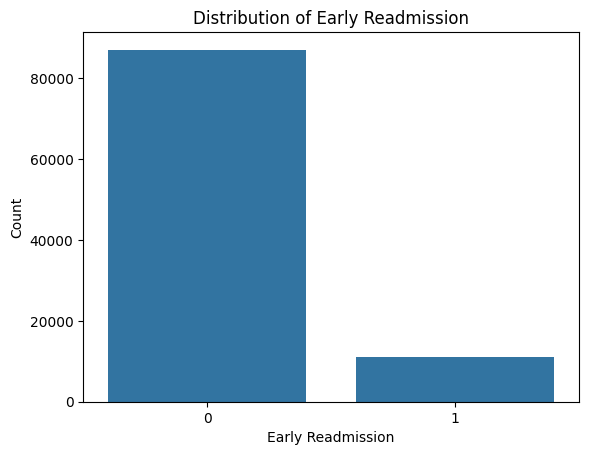

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Checking the distribution of Early Readmission Column
print(diabetic['early_readmission'].value_counts())

# Visualizing the imbalance using a bar plot
sns.countplot(x='early_readmission', data=diabetic)
plt.title('Distribution of Early Readmission')
plt.xlabel('Early Readmission')
plt.ylabel('Count')
plt.show()

# DATA VISUALIZATION AND ANALYSIS

##### Data Overview

In [26]:
# Importing the new dataset into dataframe and visualize the current Data
diabetic_cleaned = pd.read_csv('cleaned_data.csv')
diabetic_cleaned

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,glimepiride,pioglitazone,rosiglitazone,miglitol,change,diabetesMed,diag1_map,diag3_map,early_readmission
0,3.0,2.0,44.0,1.0,16.0,0.0,0.0,0.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,7.0,0.0,0.0
1,4.0,1.0,51.0,0.0,8.0,0.0,0.0,0.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,6.0,1.0,0.0
2,7.0,5.0,73.0,0.0,12.0,0.0,0.0,0.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
3,4.0,9.0,47.0,2.0,17.0,0.0,0.0,0.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,0.0
4,6.0,7.0,62.0,0.0,11.0,0.0,0.0,0.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,6.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# As it looks like there are null values, check for null values
diabetic_cleaned.isnull().any(axis=None)

True

In [28]:
# Remove Rows with null values
diabetic_cleaned = diabetic_cleaned.dropna()

In [29]:
# Check for Null values again
diabetic_cleaned.isnull().any(axis=None)

False

In [30]:
# New cleaned dataset overview
diabetic_cleaned

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,glimepiride,pioglitazone,rosiglitazone,miglitol,change,diabetesMed,diag1_map,diag3_map,early_readmission
0,3.0,2.0,44.0,1.0,16.0,0.0,0.0,0.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,7.0,0.0,0.0
1,4.0,1.0,51.0,0.0,8.0,0.0,0.0,0.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,6.0,1.0,0.0
2,7.0,5.0,73.0,0.0,12.0,0.0,0.0,0.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
3,4.0,9.0,47.0,2.0,17.0,0.0,0.0,0.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,0.0
4,6.0,7.0,62.0,0.0,11.0,0.0,0.0,0.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,6.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56894,8.0,3.0,31.0,2.0,24.0,0.0,0.0,0.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0
56895,7.0,5.0,21.0,1.0,16.0,0.0,0.0,1.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,8.0,0.0
56896,7.0,3.0,51.0,0.0,16.0,0.0,0.0,0.0,9.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
56897,8.0,5.0,33.0,3.0,18.0,0.0,0.0,1.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0


In [31]:
# Removing Whitespace
diabetic_cleaned = diabetic_cleaned.applymap(lambda x: x.strip() if isinstance(x,str) else x)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19096\3673795244.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  diabetic_cleaned = diabetic_cleaned.applymap(lambda x: x.strip() if isinstance(x,str) else x)


In [32]:
# Save cleaned data to a new CSV file
diabetic_cleaned.to_csv('new_cleaned_data.csv', index=False)
print("\nCleaned data saved to 'new_cleaned_data.csv'")


Cleaned data saved to 'new_cleaned_data.csv'


In [33]:
# Importing the new dataset into dataframe and visualize the current Data
new_diabetic_cleaned = pd.read_csv('new_cleaned_data.csv')
new_diabetic_cleaned

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,glimepiride,pioglitazone,rosiglitazone,miglitol,change,diabetesMed,diag1_map,diag3_map,early_readmission
0,3.0,2.0,44.0,1.0,16.0,0.0,0.0,0.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,7.0,0.0,0.0
1,4.0,1.0,51.0,0.0,8.0,0.0,0.0,0.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,6.0,1.0,0.0
2,7.0,5.0,73.0,0.0,12.0,0.0,0.0,0.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
3,4.0,9.0,47.0,2.0,17.0,0.0,0.0,0.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,0.0
4,6.0,7.0,62.0,0.0,11.0,0.0,0.0,0.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,6.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56894,8.0,3.0,31.0,2.0,24.0,0.0,0.0,0.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0
56895,7.0,5.0,21.0,1.0,16.0,0.0,0.0,1.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,8.0,0.0
56896,7.0,3.0,51.0,0.0,16.0,0.0,0.0,0.0,9.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
56897,8.0,5.0,33.0,3.0,18.0,0.0,0.0,1.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0


##### Data Visualization & Analysis

In [34]:
# Necessary Library
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1. Gender Distribution
plt.figure(figsize=(10, 6))
gender_counts = new_diabetic_cleaned['gender'].value_counts()
gender_labels = ['Female', 'Male'] if len(gender_counts) == 2 else gender_counts.index
plt.pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', startangle=140)
plt.title('Gender Proportion')
plt.show()

# Counting the occurrences of each gender value and assigning labels for clarity
gender_counts = new_diabetic_cleaned['gender'].value_counts()
gender_labels = {1: 'Male', 0: 'Female'}

# Mapping counts to labels
gender_output = {gender_labels[key]: value for key, value in gender_counts.items()}
gender_output

KeyError: 'gender'

<Figure size 1000x600 with 0 Axes>

In [ ]:
# 2. Age Distribution
sns.histplot(new_diabetic_cleaned['age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Mapping age groups
new_diabetic_cleaned['age_group'] = new_diabetic_cleaned['age'].map(age_mapping)

# Define readable labels for each age group in a format similar to the desired output
age_group_labels = {
    0: "Age Group 0 [0-10]",
    1: "Age Group 1 [10-20]",
    2: "Age Group 2 [20-30]",
    3: "Age Group 3 [30-40]",
    4: "Age Group 4 [40-50]",
    5: "Age Group 5 [50-60]",
    6: "Age Group 6 [60-70]",
    7: "Age Group 7 [70-80]",
    8: "Age Group 8 [80-90]",
    9: "Age Group 9 [90-100]"
}

# Counting each age group and organizing it in a dictionary for easier reading
age_counts = new_diabetic_cleaned['age'].value_counts().sort_index()
age_output = {age_group_labels[i]: age_counts.get(i, 0) for i in range(10)}
age_output

NameError: name 'sns' is not defined

In [ ]:
# 3. Race Distribution
race_counts = new_diabetic_cleaned.filter(regex="^race_").sum()
plt.figure(figsize=(10, 6))
race_counts.plot(kind='bar')
plt.title('Distribution of Patients by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

race_counts

NameError: name 'new_diabetic_cleaned' is not defined

In [ ]:
# 4. Diabetes Medication Usage
plt.figure(figsize=(10, 6))
diabetes_med_counts = new_diabetic_cleaned['diabetesMed'].value_counts()
diabetes_med_labels = ['On Medication', 'Not on Medication'] if len(diabetes_med_counts) == 2 else diabetes_med_counts.index
plt.pie(diabetes_med_counts, labels=diabetes_med_labels, autopct='%1.1f%%', startangle=140)
plt.title('Diabetes Medication Usage')
plt.show()

# Counting the occurrences of "On Medication" and assigning labels for clarity
diabetes_med_counts = new_diabetic_cleaned['diabetesMed'].value_counts()
diabetes_med_labels = {1: 'On Medication', 0: 'Not on Medication'}

# Mapping counts to labels
diabetes_med_output = {diabetes_med_labels[key]: value for key, value in diabetes_med_counts.items()}
diabetes_med_output

In [ ]:
# 5. Change in Medication Proportion
plt.figure(figsize=(10, 6))
change_counts = new_diabetic_cleaned['change'].value_counts()
change_labels = ['Medication Changed', 'No Change'] if len(change_counts) == 2 else change_counts.index
plt.pie(change_counts, labels=change_labels, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Patients with Medication Change')
plt.show()

# Counting the occurrences of "Medication Changed" and assigning labels for clarity
change_counts = new_diabetic_cleaned['change'].value_counts()
change_labels = {1: 'Medication Changed', 0: 'No Change'}

# Mapping counts to labels
change_output = {change_labels[key]: value for key, value in change_counts.items()}
change_output

In [ ]:
# 6. Early Readmission Rates
plt.figure(figsize=(10, 6))
readmission_counts = new_diabetic_cleaned['early_readmission'].value_counts()
readmission_labels = ['Not Readmitted', 'Readmitted'] if len(readmission_counts) == 2 else readmission_counts.index
plt.bar(readmission_labels, readmission_counts.values, color='salmon', edgecolor='black')
plt.title('Early Readmission Rates')
plt.ylabel('Count')
plt.show()

# Counting the occurrences of early readmission and assigning labels for clarity
early_readmission_counts = new_diabetic_cleaned['early_readmission'].value_counts()
readmission_labels = {1: 'Readmitted', 0: 'Not Readmitted'}

# Mapping counts to labels
early_readmission_output = {readmission_labels[key]: value for key, value in readmission_counts.items()}
early_readmission_output

In [ ]:
# Grouping by 'age' column to examine distribution across gender, race, early readmission, diabetes medication, and change in medication

# First, create age groups based on existing 'age' column if needed
age_grouped_data = new_diabetic_cleaned.groupby('age').agg(
    males=('gender', lambda x: (x == 1).sum()),
    females=('gender', lambda x: (x == 0).sum()),
    african_american=('race_AfricanAmerican', 'sum'),
    asian=('race_Asian', 'sum'),
    caucasian=('race_Caucasian', 'sum'),
    hispanic=('race_Hispanic', 'sum'),
    other_race=('race_Other', 'sum'),
    early_readmissions=('early_readmission', 'sum'),
    diabetes_medication=('diabetesMed', lambda x: (x == 1).sum()),
    change_in_medication=('change', lambda x: (x == 1).sum())
)

# Setting up a series of stacked bar charts to represent the data by age group

# Set figure size
fig, axes = plt.subplots(3, 1, figsize=(14, 18), constrained_layout=True)

# 1. Gender Distribution by Age Group (Stacked Bar Chart)
age_grouped_data[['males', 'females']].plot(kind='bar', stacked=True, color=['blue', 'pink'], ax=axes[0])
axes[0].set_title('Gender Distribution by Age Group')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Count')
axes[0].legend(title='Gender')

# 2. Race Distribution by Age Group (Stacked Bar Chart)
age_grouped_data[['african_american', 'asian', 'caucasian', 'hispanic', 'other_race']].plot(
    kind='bar', stacked=True, color=['purple', 'green', 'orange', 'brown', 'grey'], ax=axes[1])
axes[1].set_title('Race Distribution by Age Group')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Count')
axes[1].legend(title='Race')

# 3. Early Readmissions, Diabetes Medication Usage, and Change in Medication by Age Group
age_grouped_data[['early_readmissions', 'diabetes_medication', 'change_in_medication']].plot(
    kind='bar', stacked=True, color=['red', 'cyan', 'yellow'], ax=axes[2])
axes[2].set_title('Readmissions, Diabetes Medication, and Medication Change by Age Group')
axes[2].set_xlabel('Age Group')
axes[2].set_ylabel('Count')
axes[2].legend(title='Metric')

plt.show()


In [ ]:
# Checking for co-occurrence patterns and correlations in diag_1, diag_2, diag_3 columns

# Selecting only diag columns that start with 'diag_' and check their correlation
diag_columns = [col for col in new_diabetic_cleaned.columns if col.startswith('diag_')]

# Calculate correlation matrix for diagnosis columns
diag_correlation = new_diabetic_cleaned[diag_columns].corr()

# Display correlation matrix
diag_correlation

In [ ]:
import seaborn as sns

# Set up the plot size for a heatmap to represent the correlation matrix visually
plt.figure(figsize=(12, 10))

# Using seaborn to plot a heatmap of the correlation matrix
sns.heatmap(diag_correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Diagnosis Columns (diag_1, diag_2, diag_3)")
plt.show()


# MODEL SELECTION AND TRAINING

Model selection:
1. Random Forest
2. Gradient Boosting
3. Logistic Regression

# RANDOM FOREST

We aim to predict early patient readmission using the [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) because the data is structured and in tabular form. Additionally, Random Forest can be optimized to address data imbalance issues through techniques such as class weights, oversampling, and undersampling (Krawczyk, B. (2016). Learning from imbalanced data: Open challenges and future directions. Progress in Artificial Intelligence, 5(4), 221-232. https://doi.org/10.1007/s13748-016-0094-0).

In [ ]:
# MODEL 1: Random Forest Classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score

In [35]:
# Check balanced representation of target variable in training and testing sets
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

In [52]:
# Strategy 1: Oversample & undersample the training data
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy=0.5, random_state=1234)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler( random_state=1234)
X_resampled, y_resampled = undersampler.fit_resample(X_resampled, y_resampled)

# Check balanced representation of target variable in resampled training set
print(y_resampled.value_counts(normalize=True))

To address data imbalance, we first will use a combination of oversampling and undersampling to create a balanced training set with [RandomOverSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html) and [RandomUnderSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html) from the imblearn library. This approach ensures adequate representation of the minority class in the training dataset.  

In this scenario, where the dataset consists of approximately 88% negative cases and 12% positive cases, the model might otherwise predominantly predict negative cases, achieving a high accuracy score but failing to effectively detect positive cases.

By combining oversampling and undersampling, we aim to achieve balanced class representation while retaining information from the majority class. Using only undersampling may lead to information loss, while oversampling alone may result in overfitting.

In [38]:
# Check Feature Representation
print(X_resampled.describe())
print(X_test.describe())

                age  time_in_hospital  num_lab_procedures  num_procedures  \
count  35412.000000      35412.000000        35412.000000    35412.000000   
mean       6.155936          4.599938           43.623094        1.332882   
std        1.553076          3.029079           19.517295        1.686811   
min        0.000000          1.000000            1.000000        0.000000   
25%        5.000000          2.000000           32.000000        0.000000   
50%        6.000000          4.000000           44.000000        1.000000   
75%        7.000000          6.000000           57.000000        2.000000   
max        9.000000         14.000000          132.000000        6.000000   

       num_medications  number_outpatient  number_emergency  number_inpatient  \
count     35412.000000       35412.000000      35412.000000      35412.000000   
mean         16.563284           0.407856          0.287275          0.906811   
std           8.152481           1.300366          1.247997    

As the data is highly imbalanced, we will use the [F1 score](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.f1_score.html) as the evaluation metric. The F1 score, which is the harmonic mean of precision and recall, is a better metric for imbalanced data.

Random Forest Classifier Accuracy on Training Set: 0.6871
Random Forest Classifier Accuracy on Test Set: 0.6570
              precision    recall  f1-score   support

           0       0.92      0.67      0.78     17398
           1       0.17      0.52      0.25      2213

    accuracy                           0.66     19611
   macro avg       0.54      0.60      0.52     19611
weighted avg       0.83      0.66      0.72     19611



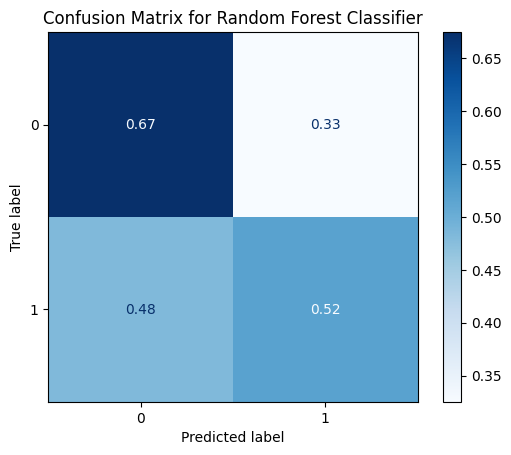

0.2543237250554324


In [40]:
# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42)

# Fit the Random Forest Classifier to the resampled training set
rf_classifier.fit(X_resampled, y_resampled)

# Make predictions on the resampled training set & test set
y_train_pred = rf_classifier.predict(X_resampled)
y_test_pred = rf_classifier.predict(X_test)

# Calculate and display the accuracy of the model (The data is imbalanced, accuracy is not the best metric)
# RFaccuracy_train = accuracy_score(y_resampled, y_train_pred)
# RFaccuracy_test = accuracy_score(y_test, y_test_pred)
# print(f'Random Forest Classifier Accuracy on Training Set (Oversampling and Undersampling): {RFaccuracy_train:.4f}')
# print(f'Random Forest Classifier Accuracy on Test Set (Oversampling and Undersampling): {RFaccuracy_test:.4f}')

# Display the classification report and F1 score
print(classification_report(y_test, y_test_pred))
print(f'F1 Score Train (Oversampling and Undersampling): {f1_score(y_resampled, y_train_pred)}')
print(f'F1 Score Test (Oversampling and Undersampling): {f1_score(y_test, y_test_pred)}')

# Create Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred, normalize='true')

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Random Forest Classifier \n (Oversampling and Undersampling)")
plt.show()

Based on the F1 score, we suspect that the model is overfitting, as the F1 score on the training set is significantly higher than on the test set. To address this issue, we will attempt another method to handle data imbalance in Random Forest, specifically by adjusting class weights.

In [41]:
# Use class weights to balance the classes
rf_classifier_cw = RandomForestClassifier(n_estimators=20, max_depth=10, class_weight='balanced', random_state=42)
# Fit the Random Forest Classifier to the resampled training set
rf_classifier_cw.fit(X_train, y_train)

# Make predictions on the resampled training set & test set
y_train_pred_cw = rf_classifier_cw.predict(X_train)
y_test_pred_cw = rf_classifier_cw.predict(X_test)

# Calculate and display the accuracy of the model (The data is imbalanced, accuracy is not the best metric)
# RFaccuracy_train_cw = accuracy_score(y_train, y_train_pred_cw)
# RFaccuracy_test_cw = accuracy_score(y_test, y_test_pred_cw)
# print(f'Random Forest Classifier Accuracy on Training Set (Class weight): {RFaccuracy_train_cw:.4f}')
# print(f'Random Forest Classifier Accuracy on Test Set (Class weight): {RFaccuracy_test_cw:.4f}')

# Display the classification report and F1 score
print(classification_report(y_test, y_test_pred_cw))
print(f'F1 Score Train (Class weight): {f1_score(y_train, y_train_pred_cw)}')
print(f'F1 Score Test (Class weight): {f1_score(y_test, y_test_pred_cw)}')

# Create Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred_cw, normalize='true')

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Random Forest Classifier \n (Class Weight)")
plt.show()

Best Hyperparameters: OrderedDict({'max_depth': 27, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150})
Test Accuracy: 0.7700


With the class weight approach, the model no longer appears to overfit, but its performance is still not sufficient, especially with low recall for class 1. This indicates that the model is still not effectively detecting positive cases. To improve performance, we will try hyperparameter tuning.  

We use Bayesian Optimization from Scikit-Optimize [(BayesSearchCV)]((https://scikit-optimize.github.io/stable/modules/generated/skopt.BayesSearchCV.html)) for hyperparameter tuning, as it is more efficient than Random Search or Grid Search. Bayesian Optimization focuses the search on the most promising regions of the parameter space, typically finding optimal or near-optimal solutions with fewer iterations, thus saving computation time.

We aim to use parameter values that minimize overfitting, which is why we keep n_estimators and max_depth on the lower side while increasing min_samples_split and min_samples_leaf.

In [43]:
# # Run this Cell to do the Hyperparameter Tuning, otherwise skip to the next cell
# # Hyperparameter Tuning
# from sklearn.metrics import accuracy_score
# from skopt import BayesSearchCV
# import numpy as np

# # Define the search space for Random Forest hyperparameters
# param_space = {
#     'n_estimators': (1, 20),              # Number of trees in the forest
#     'max_depth': (1, 8),                   # Maximum depth of each tree
#     'min_samples_split': (5, 10),           # Minimum number of samples required to split an internal node
#     'min_samples_leaf': (5, 10),             # Minimum number of samples required to be at a leaf node
#     'class_weight': ['balanced', 'balanced_subsample', None]      # Weights associated with classes in the form {class_label: weight}
# }

# # Initialize the Random Forest Classifier
# rf_classifier = RandomForestClassifier(random_state=42)

# # Set up the Bayesian Optimization using BayesSearchCV
# opt = BayesSearchCV(
#     estimator=rf_classifier,
#     search_spaces=param_space,
#     n_iter=30,  # Number of iterations to perform
#     cv=5,       # Number of folds in cross-validation
#     n_jobs=-1,  # Use all available cores
#     scoring='f1',  # Scoring metric to optimize
#     random_state=1234
# )
# # Fit the Bayesian Optimization search to the training data
# opt.fit(X_train, y_train)

# # Print the best hyperparameters found by the Bayesian optimization
# print("Best Hyperparameters:", opt.best_params_)

# # Make predictions on the test set using the optimized model
# y_train_pred = opt.best_estimator_.predict(X_train)
# y_test_pred = opt.best_estimator_.predict(X_test)

# # Calculate F1 score for the training and test sets
# print(f"F1 Score Train: {f1_score(y_train, y_train_pred):.4f}")
# print(f"F1 Score Test: {f1_score(y_test, y_test_pred):.4f}")

# RFaccuracy_train = accuracy_score(y_train, y_train_pred)
# RFaccuracy_test = accuracy_score(y_test, y_test_pred)
# print(f'Random Forest Classifier best parameter Accuracy on Training Set: {RFaccuracy_train:.4f}')
# print(f'Random Forest Classifier best parameter Accuracy on Test Set: {RFaccuracy_test:.4f}')
# print(classification_report(y_test, y_test_pred))

# # Generate the confusion matrix
# cm = confusion_matrix(y_test, y_test_pred, normalize='true')

# # Display the confusion matrix
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot(cmap='Blues')
# plt.title("Confusion Matrix for Random Forest Classifier (Class Weight-tuned)")
# plt.show()


              precision    recall  f1-score   support

           0       0.90      0.84      0.87     17398
           1       0.19      0.29      0.22      2213

    accuracy                           0.78     19611
   macro avg       0.54      0.56      0.55     19611
weighted avg       0.82      0.78      0.80     19611



Confusion Matrix:
 [[0.84095873 0.15904127]
 [0.7148667  0.2851333 ]]


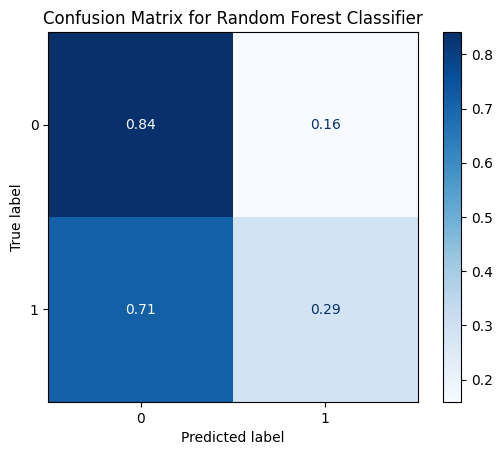

0.22491534485831402


In [44]:
# using the best parameters to train the model (without running the hyperparameter tuning again)
rf_classifier_tuned = RandomForestClassifier(n_estimators=20, max_depth=7, min_samples_split=5, min_samples_leaf=5, 
                                             class_weight='balanced_subsample', random_state=42)
rf_classifier_tuned.fit(X_train, y_train)
y_train_pred = rf_classifier_tuned.predict(X_train)
y_test_pred = rf_classifier_tuned.predict(X_test)

# Display the classification report and F1 score
print(classification_report(y_test, y_test_pred))
print(f'F1 Score Train: {f1_score(y_train, y_train_pred)}')
print(f'F1 Score Test: {f1_score(y_test, y_test_pred)}')

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred, normalize='true')

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Random Forest Classifier \n (Class Weight-tuned)")
plt.show()

After hyperparameter tuning, the recall for class 1 improves, as does the F1 score. The reduced difference between the F1 scores on the training and test sets suggests that the model is no longer overfitting.  

With the tuned model, we will extract feature importance to identify which features are most influential in predicting early readmission. We will use the [feature_importances_](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) attribute from the Random Forest model.


In [45]:
# Evaluate feature importance
feature_importances = rf_classifier_tuned.feature_importances_

# Convert into Dataframe
feature_importance_df = pd.DataFrame({
    'Feature': X_resampled.columns,
    'Importance': feature_importances
})

# Sort feature importances in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print(feature_importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  
plt.show()

number_inpatient: 0.012 ± 0.002
glimepiride: 0.001 ± 0.000
diabetesMed: 0.000 ± 0.001
miglitol: 0.000 ± 0.000
repaglinide: -0.000 ± 0.000
age: -0.000 ± 0.001
rosiglitazone: -0.000 ± 0.000
number_outpatient: -0.000 ± 0.001
pioglitazone: -0.001 ± 0.000
diag3_map: -0.001 ± 0.001
number_emergency: -0.001 ± 0.001
number_diagnoses: -0.002 ± 0.002
metformin: -0.002 ± 0.001
change: -0.002 ± 0.001
num_lab_procedures: -0.002 ± 0.001
diag1_map: -0.003 ± 0.001
num_procedures: -0.005 ± 0.001
time_in_hospital: -0.008 ± 0.001
num_medications: -0.008 ± 0.002


Based on the results of feature importance, the top features driving model predictions are:
1. Number of inpatient visits
2. Number of lab procedures
3. Number of medications
4. Time in hospital

The feature importance results suggest that the number of inpatient visits plays a significant role in predicting the likelihood of early readmission, as its importance score is substantially higher than other features.

We also see several features with low importance scores, indicating they do not significantly contribute to the model's predictive power (e.g., 'miglitol,' 'metformin,' 'number_outpatient,' and 'num_procedures').


# LOGISTIC REGRESSION: Mohamed Hashem - 285780
Logistic Regression has been utilized in this project becasue of its ability to predict categorical dependent variable- true of false, 0 or 1- based on the given data. To start, we use the resampled data and apply the logistic regression model on it. The max_iter is set to 2000 to avoid the program from not converging.

Logistic Regression Accuracy on Training Set: 0.5929
Logistic Regression Accuracy on Test Set: 0.6714
              precision    recall  f1-score   support

           0       0.91      0.69      0.79     17398
           1       0.17      0.49      0.25      2213

    accuracy                           0.67     19611
   macro avg       0.54      0.59      0.52     19611
weighted avg       0.83      0.67      0.73     19611

Confusion Matrix:
 [[0.69462007 0.30537993]
 [0.51107094 0.48892906]]


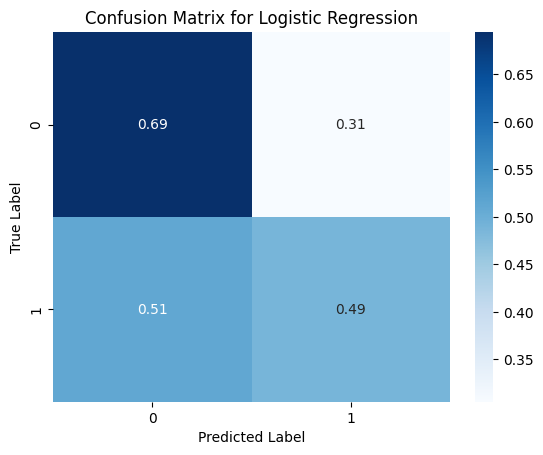

In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter = 2000, random_state=42)

# Fit the model to the training data
log_reg.fit(X_resampled, y_resampled)   

# Make predictions on the resampled training set
y_train_pred_log = log_reg.predict(X_resampled)

# Make predictions on the test set
y_test_pred_log = log_reg.predict(X_test)

# Calculate accuracy
log_accuracy_train = accuracy_score(y_resampled, y_train_pred_log)
log_accuracy_test = accuracy_score(y_test, y_test_pred_log)
print(f'Logistic Regression Accuracy on Training Set: {log_accuracy_train:.4f}')
print(f'Logistic Regression Accuracy on Test Set: {log_accuracy_test:.4f}')

# Print classification report
print(classification_report(y_test, y_test_pred_log))

# Generate the confusion matrix
log_CM = confusion_matrix(y_test, y_test_pred_log, normalize='true')

# Print the confusion matrix
print("Confusion Matrix:\n", log_CM)
sns.heatmap(log_CM, annot=True, cmap='Blues', fmt=".2f")
plt.title("Confusion Matrix for Logistic Regression")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

The f1 score for readmission is low. We can improve that number by obtaining and sampling the top features from the data set. 

In [47]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance_log = permutation_importance(
    log_reg, X_test, y_test, n_repeats=10, random_state=42
    )

# Display permutation importance
log_importance_mean = perm_importance_log.importances_mean
log_importance_std = perm_importance_log.importances_std

best_features = []
for idx, i in enumerate(log_importance_mean.argsort()[::-1]):
    print(f'features: {X.columns[i]}, importance mean: {log_importance_mean[i]:.3f}, importance standard deviation {log_importance_std[i]:.3f}')
    if idx < 20:
        best_features.append(X.columns[i])

features: number_inpatient, importance mean: 0.024, importance standard deviation 0.002
features: num_procedures, importance mean: 0.007, importance standard deviation 0.001
features: number_emergency, importance mean: 0.003, importance standard deviation 0.001
features: diag1_map, importance mean: 0.003, importance standard deviation 0.001
features: glimepiride, importance mean: 0.002, importance standard deviation 0.000
features: metformin, importance mean: 0.002, importance standard deviation 0.001
features: pioglitazone, importance mean: 0.000, importance standard deviation 0.000
features: number_outpatient, importance mean: 0.000, importance standard deviation 0.000
features: rosiglitazone, importance mean: 0.000, importance standard deviation 0.000
features: miglitol, importance mean: -0.000, importance standard deviation 0.000
features: diag3_map, importance mean: -0.000, importance standard deviation 0.001
features: repaglinide, importance mean: -0.000, importance standard devi

In [48]:
# split the data with x being the top 20 features
x_logreduced = diabetic[best_features]
y = diabetic['early_readmission']

# the data is now split into training and testing sets.
X_train_logreduced, X_test_logreduced, y_train, y_test = train_test_split(x_logreduced, y, test_size=0.2, stratify=y, random_state=1234)

oversampler_logreduced = RandomOverSampler(random_state=1234)
X_resampled_logreduced, y_resampled_logreduced = oversampler_logreduced.fit_resample(x_logreduced, y)

We then apply the logistic regression model on the newly sampled/ reduced data set.

Logistic Regression Accuracy on Training Set: 0.5921
Logistic Regression Accuracy on Test Set: 0.6676
              precision    recall  f1-score   support

           0       0.91      0.69      0.79     17398
           1       0.17      0.49      0.25      2213

    accuracy                           0.67     19611
   macro avg       0.54      0.59      0.52     19611
weighted avg       0.83      0.67      0.73     19611

Confusion Matrix:
 [[0.69082653 0.30917347]
 [0.51468595 0.48531405]]


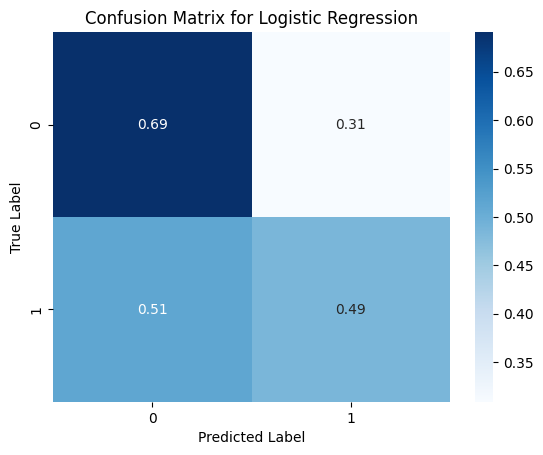

In [51]:
# Initialize the Logistic Regression model
log_reg_reduced = LogisticRegression(max_iter = 2000, random_state=42)

# Fit the model to the training data
log_reg_reduced.fit(X_resampled_logreduced, y_resampled_logreduced)

# Make predictions on the resampled training set
y_train_pred_log_reduced = log_reg_reduced.predict(X_resampled_logreduced)

# Make predictions on the test set
y_test_pred_log_reduced = log_reg_reduced.predict(X_test_logreduced)

# Calculate accuracy
log_accuracy_train_reduced = accuracy_score(y_resampled_logreduced, y_train_pred_log_reduced)
log_accuracy_test_reduced = accuracy_score(y_test, y_test_pred_log_reduced)
print(f'Logistic Regression Accuracy on Training Set: {log_accuracy_train_reduced:.4f}')
print(f'Logistic Regression Accuracy on Test Set: {log_accuracy_test_reduced:.4f}')

# Print classification report
print(classification_report(y_test, y_test_pred_log_reduced))

# Generate the confusion matrix
log_CM_reduced = confusion_matrix(y_test, y_test_pred_log_reduced, normalize='true')

# Print the confusion matrix
print("Confusion Matrix:\n", log_CM_reduced)
sns.heatmap(log_CM_reduced, annot=True, cmap='Blues', fmt=".2f")
plt.title("Confusion Matrix for Logistic Regression")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


While there is an imporvement to the readmission f1 score, the precentage is still not that far from the original sampled data set. This means that while reducing the data to only the top 20 features yields a small improvement, it minimizes the complexity of the model, making it a good compromise.

# HiISTOGRAM-BASED GRADIENT BOOSTING

Histogram-Based Gradient Boosting (HGBT) is one of the models that has been used in this project. Normal gradient boosting was initially considered, but as [HGBT](https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html) is faster for large datasets, HGBT was chosen as the preferred model between the two.

Gradient Booster Classifier Accuracy on Training Set: 0.7406811250423585
Gradient Booster Classifier Accuracy on Test Set: 0.5532609249910765
              precision    recall  f1-score   support

           0       0.89      0.57      0.69     17398
           1       0.11      0.43      0.18      2213

    accuracy                           0.55     19611
   macro avg       0.50      0.50      0.44     19611
weighted avg       0.80      0.55      0.64     19611



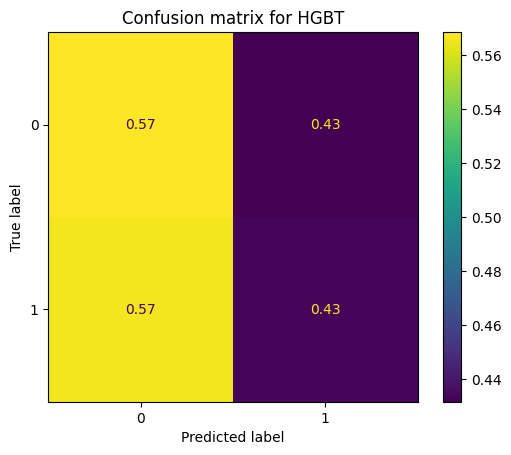

In [54]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score
from imblearn.over_sampling import RandomOverSampler

# Oversample the training data
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)


Many different sampling techniques have been tested, such as [RandomOverSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html), [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) and [SMOTE-Tomek](https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTETomek.html). Looking at the results, specifically the f1 score, the sampling techniques have a similar affect. However, SMOTE-Tomek yielded the worst f1 score and increased the overall computation time. RandomOverSampler was chosen as the optimal approach, since it's a bit faster than SMOTE and has a marginal increase in f1 score.

In [ ]:
# Initialize Gradient Booster Classifier
gb_classifier = HistGradientBoostingClassifier(max_iter=200, random_state=42)

# Fit the Gradient Booster Classifier to the training set
gb_classifier.fit(X_resampled, y_resampled)

# Make predictions on the training set
y_train_pred_gb = gb_classifier.predict(X_resampled)

# Make predictions on the test set
y_test_pred_gb = gb_classifier.predict(X_test)

# Calculate accuracy
GBaccuracy_train = accuracy_score(y_resampled, y_train_pred_gb)
GBaccuracy_test = accuracy_score(y_test, y_test_pred_gb)
print('Gradient Booster Classifier Accuracy on Training Set:', GBaccuracy_train)
print('Gradient Booster Classifier Accuracy on Test Set:', GBaccuracy_test)

# Display classification report and confusion matrix
print(classification_report(y_test, y_test_pred_gb))
cm_gb_plot = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_gb, normalize='true')
plt.title('Confusion matrix for HGBT')
plt.show()

Initially, the model is not very accurate. It is doing a decent job at predicting 0's as 0's, but not 1's as 1's. 

To try and improve the model, we use hyperparametertuning to optimize the parameters and to tune the model.

In [55]:
'''Run this cell if you want to perform the hypertuning'''

from skopt import BayesSearchCV
# Define the grid of hyperparameters
param_space_gb = {
    'max_iter': [10, 20, 50],
    'max_depth': [1, 3, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_samples_leaf': [1, 2, 4, 6, 10],
    'early_stopping': [True],
}

# Initialize the Histogram-Based Gradient Booster
gb_classifier = HistGradientBoostingClassifier(random_state=42, class_weight='balanced')

# Set up the Bayesian Optimization using BayesSearchCV
opt_gb = BayesSearchCV(
    estimator=gb_classifier,
    search_spaces=param_space_gb,
    n_iter=30,  # Number of iterations to perform
    cv=3,       # Number of folds in cross-validation
    n_jobs=-1,  # Use all available cores
    random_state=42, 
    scoring='f1' # Optimize f1 metric
)
# Fit the Bayesian Optimization search to the training data
opt_gb.fit(X_resampled, y_resampled)

# Print the best hyperparameters found by the Bayesian optimization
print("Best Hyperparameters:", opt_gb.best_params_)

'Run this cell if you want to perform the hypertuning.'

The best hyperparameters for the given range are: 
'learning_rate': 0.1, 'max_depth': 5, 'max_iter': 50, 'min_samples_leaf': 4.

Increasing the given range doesn't improve the class 1 predictions. Rather, the model perform worse. However, the overall accuracy is increased if we use a larger range of values. Since we value a higher f1 score and recall, we chose to keep the range of values low.

Gradient Booster Classifier best parameter Accuracy on Training Set: 0.8563481305772055
Gradient Booster Classifier best parameter Accuracy on Test Set: 0.5991025444903371
              precision    recall  f1-score   support

           0       0.89      0.63      0.73     17398
           1       0.12      0.39      0.18      2213

    accuracy                           0.60     19611
   macro avg       0.50      0.51      0.46     19611
weighted avg       0.80      0.60      0.67     19611



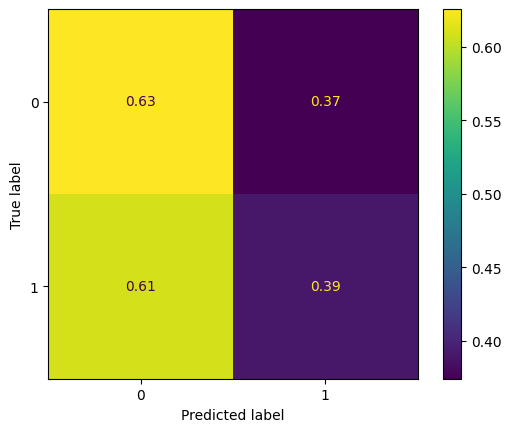

In [56]:
# Initialize the Histogram-Based Gradient Booster
opt_gb = HistGradientBoostingClassifier(max_iter=50, learning_rate= 0.1, max_depth= 5, min_samples_leaf= 4, random_state=42, class_weight = 'balanced')

# Fit the Bayesian Optimization search to the training data
opt_gb.fit(X_resampled, y_resampled)

# Make predictions on the training set
y_train_pred_gb = opt_gb.predict(X_resampled)

# Make predictions on the test set
y_test_pred_gb = opt_gb.predict(X_test)

# Calculate accuracy
GBaccuracy_train = accuracy_score(y_resampled, y_train_pred_gb)
GBaccuracy_test = accuracy_score(y_test, y_test_pred_gb)
print('Gradient Booster Classifier best parameter Accuracy on Training Set:', GBaccuracy_train)
print('Gradient Booster Classifier best parameter Accuracy on Test Set:', GBaccuracy_test)

# Display the Confusion Matrix and the classification report
cm_gb_plot = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_gb, normalize='true')
print(classification_report(y_test, y_test_pred_gb))
plt.title('Confusion matrix for HGBT')
plt.show()

After hyperparametertuning, the model has not improved much, except for a slight increase in recall for class 1, at the cost of an overall lower accuracy for both the training and test set. The recall for class 1 is 0.54 and the f1 score is 0.26. Without further modifications to for example the sampling technique, the model seem to hit a wall at a 0.26 f1 score.

In [57]:
from sklearn.inspection import permutation_importance

# Calculate the permutation feature importances
feature_importances_gb = permutation_importance(
    opt_gb, X_resampled, y_resampled, n_repeats=10, random_state=42
)

# Get the mean and standard deviation of the feature importances
importance_mean = feature_importances_gb.importances_mean
importance_std = feature_importances_gb.importances_std

# Display the feature importances
for idx, i in enumerate(importance_mean.argsort()[::-1]):
    print(f'feature: {X.columns[i]}, importance_mean: {importance_mean[i]}, importance_std: {importance_std[i]}')


feature: age, importance_mean: 0.0038651777063892665, importance_std: 0.0030176457267467463
feature: time_in_hospital, importance_mean: 0.003125796746723808, importance_std: 0.0016887523291738225
feature: change, importance_mean: 0.002340523175768716, importance_std: 0.001489527714882584
feature: number_emergency, importance_mean: 0.0017643159451328438, importance_std: 0.0010879788869929913
feature: rosiglitazone, importance_mean: 0.0013818775177196652, importance_std: 0.000658742096500278
feature: pioglitazone, importance_mean: 0.0011116210290143536, importance_std: 0.0007455271789300742
feature: glimepiride, importance_mean: 0.0006730916322472246, importance_std: 0.0004097151481637917
feature: metformin, importance_mean: 0.0006628932741828631, importance_std: 0.0014945031757434971
feature: diabetesMed, importance_mean: 0.0002702564887053338, importance_std: 0.0006033645472327212
feature: diag1_map, importance_mean: 1.5297537096536916e-05, importance_std: 0.0019946916891832125
feature

The importance features that contributes the most in this model are all features that you might expect to show up. The most imporant feature, number of inpatient visits has a value of 0.745 - indicating a high influence. These are some of the features that impact the model the most:

1. Number of inpatient visits
2. Time in the hospital
3. Number of medications
4. Number of lab procedures

There are also a number of features with a near zero value, which indicates that their influence on the model is rather weak.

# MODEL EVALUATION

Things to do:
1. Introduction, research Question (Mohamed)
2. Data Preprocessing & Decision tree features (medical specialty) (Ula)
3. Model Selection and Training, hyperparameter tuning (FLAML)  
    a. Random Forest (Dea)  
    b. Logistic Regression (Mohamed)  
    c. Gradient Boosting (Sander)  
4. Data visualization and analysis (Elora)
5. Model Evaluation

# Conclusion

The objective of this project was to use three distinct machine learning models—Random Forest, Gradient Boosting, and Logistic Regression—to predict the early readmission of diabetes patients. The actions listed below were taken:

1. **Importation of Data and First Investigation**:

   -After importing the dataset, its shape was examined.

   -The dataset was first explored in order to comprehend its content and structure.



2. **Preprocessing and Data Cleaning**:

   -Missing values were found and dealt with. Columns with missing values more than 40% were eliminated.

   -IDs and other irrelevant columns were eliminated.

   - Rows in the important columns (`diag_1`, `diag_2`, `diag_3`, `race`) that had missing values were removed.

   -ICD-9 codes were used to map diagnosis codes to categories.

   -Ordinal encoding was used to translate age ranges into numerical numbers.

   -Label encoding was applied to categorical columns.

   -The binary variable "early_readmission" was created from the target variable "readmitted."

3. **Feature Selection** 
   
   - Demographic data, medical history, and prescription information were among the final characteristics.

4. **Model Evaluation**
   
   -The dataset was divided into training and testing sets.
  
   -Three distinct models—Random Forest, Gradient Boosting, and Logistic Regression—were trained and assessed.
  
   -GridSearchCV was used for hyperparameter tuning in order to determine the optimal hyperparameters for every model.
  
   -The models' performance was assessed using the confusion matrix, accuracy, and classification report.


## Results

 




## References

1. Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, “Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records,” BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.